In [2]:
import pandas as pd

# Cargar base de datos de pickle
df = pd.read_pickle("data/df.pkl")

# Afiliados

In [22]:
# Crear tabla con únicos de Afiliado_Id  y estas columnas	Sexo,	Edad y	Regional_desc
df_uniques = df.drop_duplicates(subset=["Afiliado_Id"])[
    ["Afiliado_Id", "Sexo", "Edad", "Regional_desc"]
]
print("Afiliados únicos: ", df_uniques.shape[0])

# Gráfico de torta por sexo en df_uniques con plotly con el total en medio y etiquetas
import plotly.express as px

fig = px.pie(
    df_uniques,
    names="Sexo",
    title="Distribución de sexo",
    hole=0.5,
    color_discrete_sequence=px.colors.sequential.RdBu,
)

# Agregar etiquetas
fig.update_traces(
    textposition="inside",
    textinfo="label+percent",
    hovertemplate="%{label}: %{value} (%{percent})",
)

fig.show()

Afiliados únicos:  145326


In [23]:
# Histograma de la edad en df_uniques
import plotly.express as px

fig = px.histogram(
    df_uniques,
    x="Edad",
    title="Distribución de edad",
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.show()

In [24]:
# Afiliados por región ordenados de mayor a menor
import plotly.express as px

fig = px.bar(
    df_uniques.groupby(["Regional_desc"])
    .agg({"Afiliado_Id": "count"})
    .sort_values("Afiliado_Id", ascending=False)
    .reset_index(),
    x="Regional_desc",
    y="Afiliado_Id",
    title="Afiliados por región",
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.show()

In [25]:
# Agrupar los afiliados por costo total de utilizaciones
df_uniques_costo_total = (
    df.groupby(["Afiliado_Id"])
    .agg({"Costo_Total_Utilizaciones": "sum"})
    .sort_values("Costo_Total_Utilizaciones", ascending=False)
    .reset_index()
)

# Calcula el costo promedio de los afiliados y ponlo en print
print(
    "Costo promedio de utilizaciones de los afiliados: ",
    df_uniques_costo_total["Costo_Total_Utilizaciones"].mean().round(0),
)


# Gráfico de barras afiliado vs costo total de utilizaciones ordenado de mayor a menor
import plotly.express as px

fig = px.bar(
    df_uniques_costo_total.head(100),
    x="Afiliado_Id",
    y="Costo_Total_Utilizaciones",
    title="Afiliado vs costo total de utilizaciones",
    color_discrete_sequence=px.colors.sequential.RdBu,
    labels={
        "Afiliado_Id": "Afiliado",
        "Costo_Total_Utilizaciones": "Costo Total de Utilizaciones",
    },
)
fig.update_xaxes(type="category")
fig.show()

# Hacer lo mismo pero con cantidad de utilizaciones
df_uniques_cantidad_utilizaciones = (
    df.groupby(["Afiliado_Id"])
    .agg({"Cantidad_Utilizaciones": "sum"})
    .sort_values("Cantidad_Utilizaciones", ascending=False)
    .reset_index()
)

print(
    "Cantidad promedio de utilizaciones de los afiliados: ",
    df_uniques_cantidad_utilizaciones["Cantidad_Utilizaciones"].mean().round(0),
)

# Gráfico de barras afiliado vs cantidad de utilizaciones ordenado de mayor a menor
import plotly.express as px

fig = px.bar(
    df_uniques_cantidad_utilizaciones.head(100),
    x="Afiliado_Id",
    y="Cantidad_Utilizaciones",
    title="Afiliado vs cantidad de utilizaciones",
    color_discrete_sequence=px.colors.sequential.RdBu,
    labels={
        "Afiliado_Id": "Afiliado",
        "Cantidad_Utilizaciones": "Cantidad de Utilizaciones",
    },
)
fig.update_xaxes(type="category")
fig.show()

Costo promedio de utilizaciones de los afiliados:  1173643.0


Cantidad promedio de utilizaciones de los afiliados:  7.0


# Reclamación

In [69]:
# Tabla Reclamacion_Desc que más Días_en_reclamar
df.groupby(["Reclamacion_Desc"]).agg({"Días_en_reclamar": "mean"}).round(0).sort_values(
    "Días_en_reclamar", ascending=True
).reset_index()

Reclamacion_Desc  Días_en_reclamar
0                                      ANEXO EXEQUIAL               1.0
1                                 DONACION DE ORGANOS               4.0
2   TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...              14.0
3                                        CONCILIACION              17.0
4                                         ODONTOLOGÍA              27.0
5                                            DIALISIS              34.0
6                   ATENCION INTEGRAL DE SALUD MENTAL              39.0
7                TRATAMIENTOS AMBULATORIOS ESPECIALES              40.0
8                                          VACUNACION              43.0
9   TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE              44.0
10      TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE              44.0
11     TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD              45.0
12  TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERM...              46.0
13  TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER...              46.0
14                 CIRUGIA AMBULATORIA POR ENFERMEDAD              46.0
15                                 ATENCION DEL PARTO              46.0
16                             TRASLADO EN AMBULANCIA              47.0
17                 TRATAMIENTO AMBULATORIO POR CANCER              47.0
18        TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO              48.0
19  TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y C...              48.0
20                                   CONSULTA EXTERNA              48.0
21                             FISIOTERAPIA ILIMITADA              48.0
22                      COBERTURA PROGRAMA PALIATIVOS              48.0
23                  CIRUGIA AMBULATORIA POR ACCIDENTE              48.0
24                           TRATAMIENTOS ESPECIFICOS              48.0
25  TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD ...              49.0
26                                     INFILTRACIONES              49.0
27                            EXAMENES DE DIAGNOSTICO              49.0
28                               CONSULTAS PRENATALES              49.0
29                                         FUNERARIOS              50.0
30  TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACI...              50.0
31                                               PAMD              50.0
32      TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES              51.0
33                              CONSULTA DE URGENCIAS              52.0
34                                LABORATORIO CLINICO              52.0
35                                    Sin Informacion              59.0
36       CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA              85.0

In [70]:
# COSTO TOTAL POR RECLAMACION
# Agrupación por reclamación
precio_total_por_reclamacion = (
    df.groupby("Reclamacion_Desc")["Costo_Total_Utilizaciones"].sum().head(10)
)

# Datos por precio de forma descendente
precio_total_por_reclamacion_sorted = precio_total_por_reclamacion.sort_values(
    ascending=False
)

# Gráfico
import plotly.express as px

fig = px.bar(
    x=precio_total_por_reclamacion_sorted.index,
    y=precio_total_por_reclamacion_sorted,
    title="Costo total por Reclamaciones",
    labels={"x": "Reclamación", "y": "Costo total"},
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Costo total",
        titlefont_size=16,
        tickfont_size=14,
    ),
)
fig.show()

In [71]:
# Agrupación por reclamación
cantidad_utilizaciones_por_reclamacion = (
    df.groupby("Reclamacion_Desc")["Cantidad_Utilizaciones"].sum().head(10)
)

# Datos por precio de forma descendente
cantidad_utilizaciones_por_reclamacion_sorted = (
    cantidad_utilizaciones_por_reclamacion.sort_values(ascending=False)
)

# Hacer lo de arriba pero en plotly
import plotly.express as px

fig = px.bar(
    x=cantidad_utilizaciones_por_reclamacion_sorted.index,
    y=cantidad_utilizaciones_por_reclamacion_sorted,
    title="Cantidad de utilizaciones por Reclamación",
    labels={"x": "Reclamación", "y": "Cantidad de utilizaciones"},
    color_discrete_sequence=px.colors.sequential.RdBu,
)

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Cantidad de utilizaciones",
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

# Regional

In [73]:
# Gráfico de barras de costo total de utilizaciones vs regional_desc
import plotly.express as px

fig = px.bar(
    df.groupby(["Regional_desc"])
    .agg({"Costo_Total_Utilizaciones": "sum"})
    .sort_values("Costo_Total_Utilizaciones", ascending=False)
    .reset_index(),
    x="Regional_desc",
    y="Costo_Total_Utilizaciones",
    title="Costo total de utilizaciones por región",
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.show()

In [74]:
# Gráfico de barras de costo total de utilizaciones vs regional_desc
import plotly.express as px

fig = px.bar(
    df.groupby(["Regional_desc"])
    .agg({"Cantidad_Utilizaciones": "sum"})
    .sort_values("Cantidad_Utilizaciones", ascending=False)
    .reset_index(),
    x="Regional_desc",
    y="Cantidad_Utilizaciones",
    title="Cantidad_Utilizaciones por región",
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.show()

# Matriz de correlación y mapa de calor

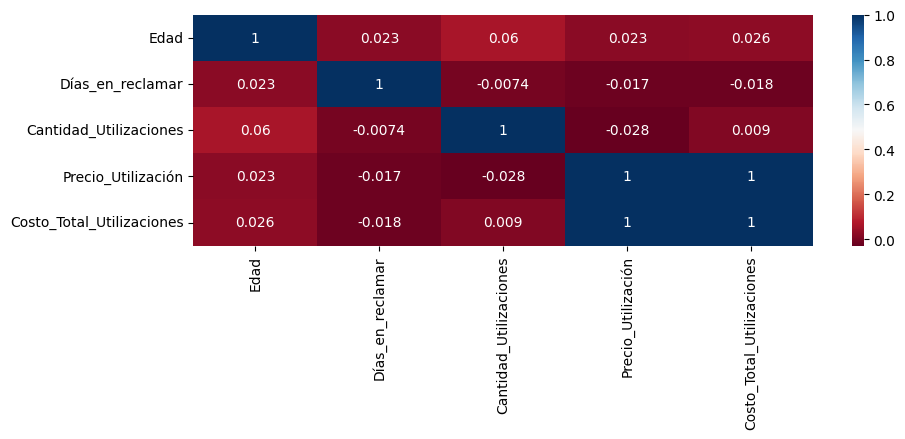

In [89]:
# matriz de correlación con mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="RdBu")
plt.show()

# Edad

In [84]:
import plotly.express as px

# Supongamos que ya has creado el DataFrame df y la columna rango_edad

# Crear rango de edades
df["Edad"] = df["Edad"].astype(int)
df["rango_edad"] = pd.cut(
    df["Edad"],
    [0, 18, 30, 50, 65, 200],
    labels=["0-18", "19-30", "31-50", "51-65", "65+"],
)

# Agrupar por rango de edad y sexo
df_grouped = (
    df.groupby(["rango_edad", "Sexo"], observed=False)
    .agg({"Cantidad_Utilizaciones": "sum"})
    .reset_index()
    .sort_values("Cantidad_Utilizaciones", ascending=False)
)

# Crear el gráfico de barras
fig = px.bar(
    df_grouped,
    x="rango_edad",
    y="Cantidad_Utilizaciones",
    color="Sexo",
    title="Cantidad de utilizaciones por rango de edad y sexo",
)

# Agregar etiquetas de total y porcentaje
total_por_rango = (
    df_grouped.groupby("rango_edad")["Cantidad_Utilizaciones"].sum().reset_index()
)

for i, row in total_por_rango.iterrows():
    total_label = f'Total: {row["Cantidad_Utilizaciones"]}<br>{row["Cantidad_Utilizaciones"] / df_grouped[df_grouped["rango_edad"] == row["rango_edad"]]["Cantidad_Utilizaciones"].sum() * 100:.2f}%'

    fig.add_annotation(
        x=row["rango_edad"],
        y=row["Cantidad_Utilizaciones"],
        text=total_label,
        showarrow=False,
        xanchor="center",
        yanchor="bottom",
    )

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Cantidad de utilizaciones",
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_6576\1326162643.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [85]:
import plotly.express as px

# Agrupar por rango de edad y sexo
df_grouped = (
    df.groupby(["rango_edad", "Sexo"], observed=False)
    .agg({"Costo_Total_Utilizaciones": "sum"})
    .reset_index()
    .sort_values("Costo_Total_Utilizaciones", ascending=False)
)

# Crear el gráfico de barras
fig = px.bar(
    df_grouped,
    x="rango_edad",
    y="Costo_Total_Utilizaciones",
    color="Sexo",
    title="Costo total de utilizaciones por rango de edad y sexo",
)

# Agregar etiquetas de total y porcentaje
total_por_rango = (
    df_grouped.groupby("rango_edad")["Costo_Total_Utilizaciones"].sum().reset_index()
)

for i, row in total_por_rango.iterrows():
    total_label = f'Total: {row["Costo_Total_Utilizaciones"]:.2f}<br>{row["Costo_Total_Utilizaciones"] / df_grouped[df_grouped["rango_edad"] == row["rango_edad"]]["Costo_Total_Utilizaciones"].sum() * 100:.2f}%'

    fig.add_annotation(
        x=row["rango_edad"],
        y=row["Costo_Total_Utilizaciones"],
        text=total_label,
        showarrow=False,
        xanchor="center",
        yanchor="bottom",
    )

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Costo total de utilizaciones",
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_6576\1620024519.py:22: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Edad y enfermedades

In [43]:
import plotly.express as px

# Frecuencia de cada enfermedad de base en los afiliados
enfermedades = ["CANCER", "EPOC", "DIABETES", "HIPERTENSION", "ENF_CARDIOVASCULAR"]
recuento = [
    sum(df["CANCER"]),
    sum(df["EPOC"]),
    sum(df["DIABETES"]),
    sum(df["HIPERTENSION"]),
    sum(df["ENF_CARDIOVASCULAR"]),
]

# Crear DataFrame para el gráfico
df_frecuencia = pd.DataFrame({"Enfermedad": enfermedades, "Recuento": recuento})

# Agregar rango de edad como color en Plotly
fig = px.bar(
    df_frecuencia,
    x="Enfermedad",
    y="Recuento",
    title="Recuento de enfermedades por rango de edad",
    labels={"x": "Enfermedad", "y": "Recuento"},
)

fig.show()

In [53]:
import plotly.express as px

# Agrupar por rango de edad y enfermedades de base, y calcular la suma de Cantidad_Utilizaciones
df_grouped = (
    df.groupby(["rango_edad", "Enfermedades_de_base"], observed=False)
    .agg({"Cantidad_Utilizaciones": "sum"})
    .reset_index()
    .sort_values("Cantidad_Utilizaciones", ascending=False)
)

# Calcular porcentaje para cada grupo de edad
df_grouped["Porcentaje"] = (
    df_grouped["Cantidad_Utilizaciones"]
    / df_grouped.groupby("rango_edad")["Cantidad_Utilizaciones"].transform("sum")
    * 100
)

# Crear el gráfico de barras apiladas en porcentaje
fig = px.bar(
    df_grouped,
    x="rango_edad",
    y="Porcentaje",
    color="Enfermedades_de_base",
    title="Porcentaje de utilizaciones por rango de edad y enfermedades de base",
)

fig.update_layout(
    xaxis_tickangle=-9,
    yaxis=dict(
        title="Porcentaje de utilizaciones",
        titlefont_size=16,
        tickfont_size=14,
    ),
)

fig.show()

C:\Users\Diego\AppData\Local\Temp\ipykernel_9892\3380720403.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Poliza

# Series de tiempo

In [100]:
# Gráfico de series de tiempo por mes para la fecha de reclamación con la cantidad de utilizaciones

df["Fecha_Reclamacion"] = pd.to_datetime(df["Fecha_Reclamacion"])
df["month"] = df["Fecha_Reclamacion"].dt.month
df["year"] = df["Fecha_Reclamacion"].dt.year
df["month_year"] = df["Fecha_Reclamacion"].dt.to_period("M")
df["month_year"] = df["month_year"].astype(str)

import plotly.express as px

fig = px.line(
    df.groupby(["month_year"]).agg({"Cantidad_Utilizaciones": "sum"}).reset_index(),
    x="month_year",
    y="Cantidad_Utilizaciones",
    title="Cantidad de utilizaciones por mes",
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.show()

In [101]:
# Gráfico de series de tiempo con la variable fecha de reclamación y el costo total de utilizaciones

fig = px.line(
    df.groupby(["month_year"]).agg({"Costo_Total_Utilizaciones": "sum"}).reset_index(),
    x="month_year",
    y="Costo_Total_Utilizaciones",
    title="Costo total de utilizaciones por mes",
    color_discrete_sequence=px.colors.sequential.RdBu,
)
fig.show()